# Análisis de sensores

## Trabajo Final de Estadística 2018

- Alumno: Emiliano López - Centro de Estudios HidroAmbientales (CENEHA) / FICH - UNL
- Docentes: Diego Tomassi / Antonella Gieco - FIQ-UNL

# Introducción

- En el estudio de fenómenos hidrológicos o ambientales es indispensable contar con mediciones in situ

- En general son usados: alimentar modelos de simulación, calibrar parámetros, comprender la dinámica de los fenómenos, etc

- Frecuentemente son necesarios dispositivos de medición de diferentes fabricantes y elevado costo

- Dificulta el mantenimiento e integración, impactando en la resolución espacial y temporal

**Desarrollos propios**

- El CENEHA comenzó a desarrollar dispositivos propios basados en hardware libre / de código abierto
- Costo de un orden de magnitud frente a alternativas comerciales/cerradas

***

<center>
    <img src="img/sensores.png" alt="drawing" width="550"/>
    <img src="img/combo-lab-campo.png" alt="drawing" width="550"/>
</center>

**Mejorar la resolución espacial y temporal**

***

<center>
<img src="img/sfe1.png" alt="drawing" width="500"/>
</center>

# Problemas 

<div class="alert alert-block alert-danger">
<b>-</b> Al reemplazar sensores, debemos contar cierta confianza sobre la equivalencia de medición con el sensor costoso. Las series son independientes.
</div>

<div class="alert alert-block alert-danger">
<b>-</b> Tenemos datos registrados en el tiempo: no son independientes
</div>

<div class="alert alert-block alert-danger">
<b>-</b>¿Qué modelo asumimos para los datos?
</div>

# Metodología

- Los datos se suponen con el modelo Auto Regresivo 1 (AR1):

$$X_t = c + \alpha X_{t-1} + \epsilon_t$$

donde $\alpha$ coeficiente de correlación serial poblacional que será aproximado con $r_1$ (muestral)

- Queremos encontrar el Error Estándar de la diferencia de medias, habrá que ajustarlo:  

***

$$SE(\bar{Y}_a - \bar{Y}_b)  =  \sqrt{ {1+r_1} \over {1-r_1} } Sp \sqrt{ {{1} \over {n_a}} + {{1} \over {n_b}}}$$

# Metodología (cont)

- Supondresmos las Desviaciones Estándar de $\bar{Y}_a$ e $\bar{Y}_b$ son iguales mediante el **estimador combinado**:

$$Sp = \sqrt{{(n_a-1) \cdot S^2_a + (n_b-1) \cdot S^2_b} \over {n_a + n_b -2}}$$

- Construir un Intervalo de Confianza y ver si incluye al 0.

$$ (\bar{Y}_a - \bar{Y}_b) \pm Z_{\alpha/2} \cdot SE(\bar{Y}_a - \bar{Y}_b)$$

# Metedología (cont)

- Temperatura ambiente: DHT22 vs Eddy Covariance
- Humedad ambiente: DHT22 vs Eddy Covariance
- Temperatura de suelo: DS18B20 vs Stevens

In [92]:
rm(list=ls())
datosHT = read.csv("datos/dht_eddyCovariance/dht_vs_eddy.csv", sep=";")
datosHT$FechayHora = as.POSIXct(datosHT$FechayHora, format = "%d/%m/%Y %H:%M")
#str(datosHT)
attach(datosHT)
head(datosHT)

The following objects are masked from datosHT (pos = 3):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 4):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 5):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy

The following objects are masked from datosHT (pos = 8):

    FechayHora, Humedad.DHT, Humedad.Eddy, Temperatura.DHT,
    Temperatura.Eddy



FechayHora,Temperatura.DHT,Humedad.DHT,Temperatura.Eddy,Humedad.Eddy
2014-12-29 10:45:00,29.1,72.3,28.10,63.05
2014-12-29 11:00:00,29.3,73.6,28.09,63.25
2014-12-29 11:15:00,29.4,69.0,28.43,60.17
2014-12-29 11:30:00,29.8,68.8,28.50,59.70
2014-12-29 11:45:00,30.2,65.4,29.04,57.51
2014-12-29 12:00:00,30.1,65.1,29.04,55.13


# Resultados

## Temperatura ambiente

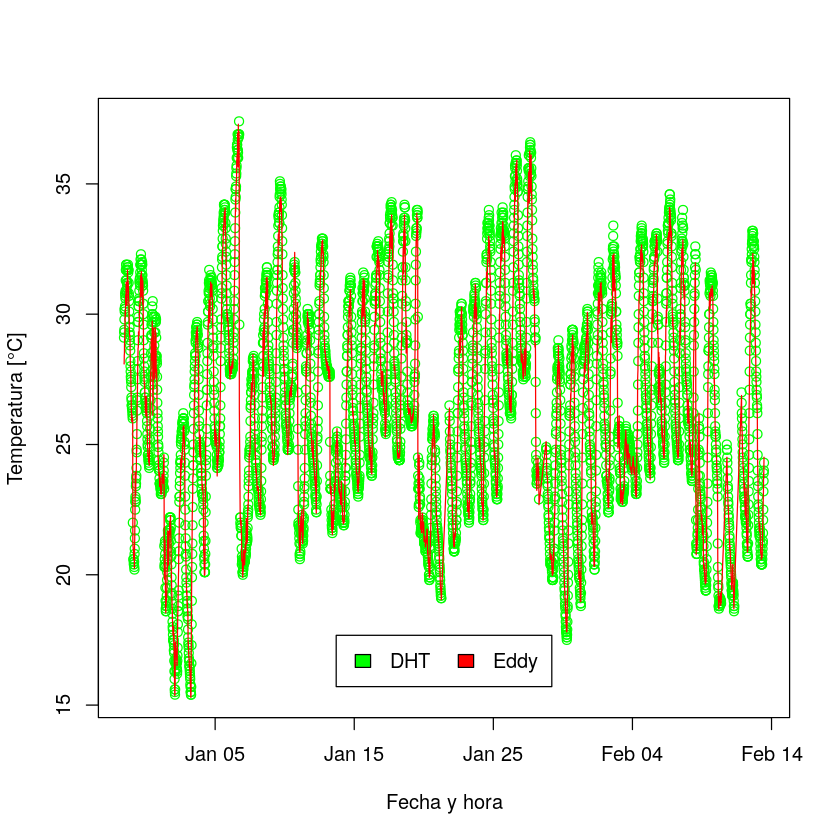

In [10]:
plot(FechayHora, Temperatura.DHT, col="green", xlab="Fecha y hora", ylab="Temperatura [°C]");lines(FechayHora, Temperatura.Eddy,col="red"); legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

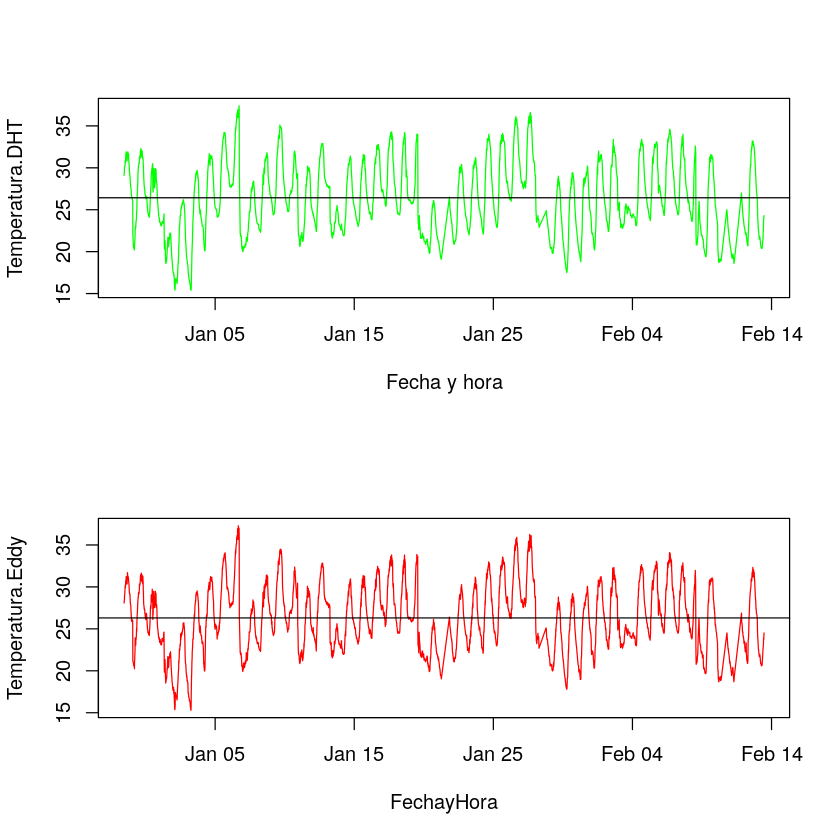

In [12]:
par(mfrow = c(2,1)); plot(Temperatura.DHT~FechayHora, col="green", xlab="Fecha y hora", type="l") ; abline(h = mean(Temperatura.DHT), v = 0,col='black'); plot(FechayHora, Temperatura.Eddy,col="red", type="lines") ; abline(h = mean(Temperatura.Eddy), v = 0,col='black'); 

Loading required package: carData


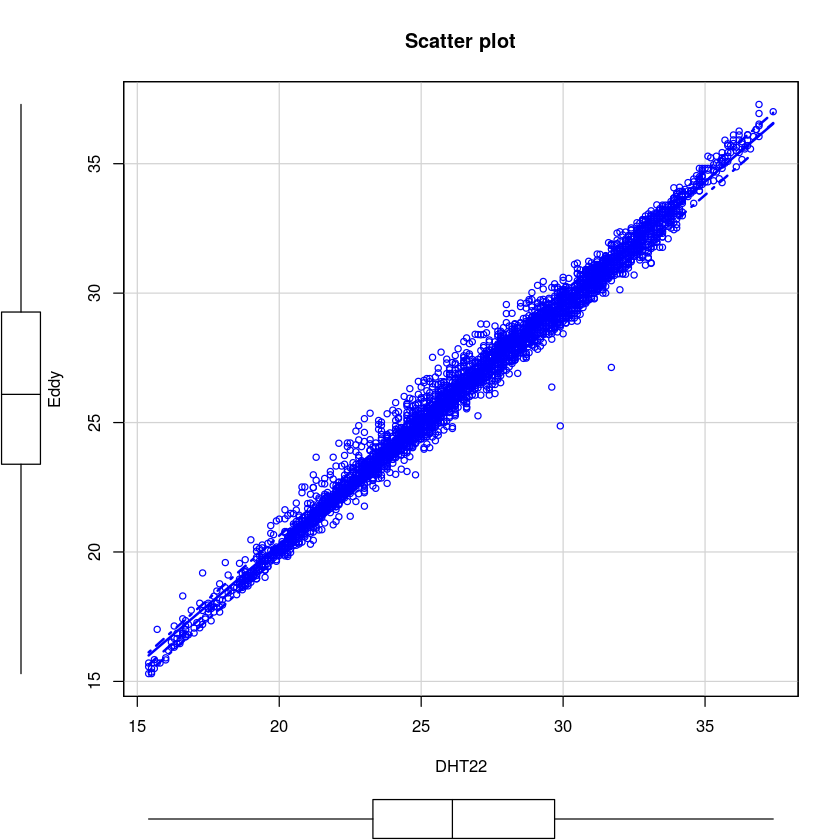

In [14]:
library(car);scatterplot(Temperatura.Eddy ~ Temperatura.DHT, data=datosHT, xlab="DHT22", ylab="Eddy", main="Scatter plot") 

In [15]:
modeloEddy = lm(Temperatura.Eddy ~ FechayHora); summary(modeloEddy)


Call:
lm(formula = Temperatura.Eddy ~ FechayHora)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9520  -2.8749  -0.2084   2.9819  11.0281 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.177e+01  7.673e+01  -0.284    0.777
FechayHora   3.382e-08  5.397e-08   0.627    0.531

Residual standard error: 4 on 4216 degrees of freedom
Multiple R-squared:  9.311e-05,	Adjusted R-squared:  -0.0001441 
F-statistic: 0.3926 on 1 and 4216 DF,  p-value: 0.531


In [34]:
modeloDHT = lm(Temperatura.DHT ~ FechayHora); summary(modeloDHT)


Call:
lm(formula = Temperatura.DHT ~ FechayHora)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9893  -3.1098  -0.3549   3.3071  11.0026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.227e+01  8.167e+01  -0.150    0.881
FechayHora   2.722e-08  5.744e-08   0.474    0.636

Residual standard error: 4.258 on 4216 degrees of freedom
Multiple R-squared:  5.325e-05,	Adjusted R-squared:  -0.0001839 
F-statistic: 0.2245 on 1 and 4216 DF,  p-value: 0.6356


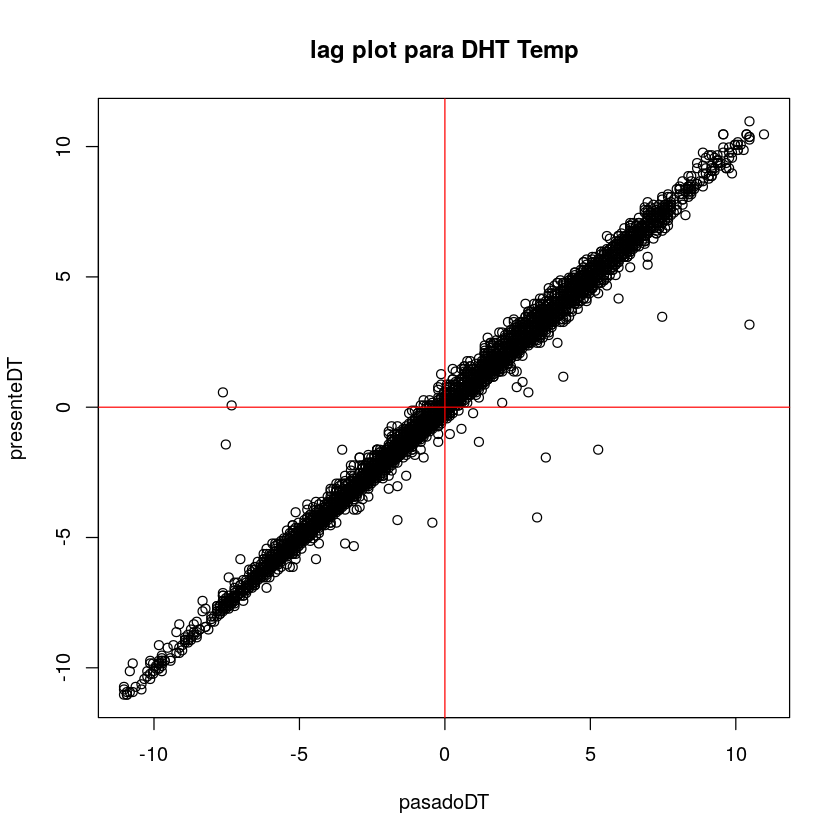

In [33]:
nN = length(Temperatura.DHT); resN = Temperatura.DHT-mean(Temperatura.DHT) ; pasadoDT = resN[-nN] ; presenteDT = resN[-1]; plot(presenteDT~pasadoDT, main = 'lag plot para DHT Temp'); abline(h = 0, v = 0,col='red')

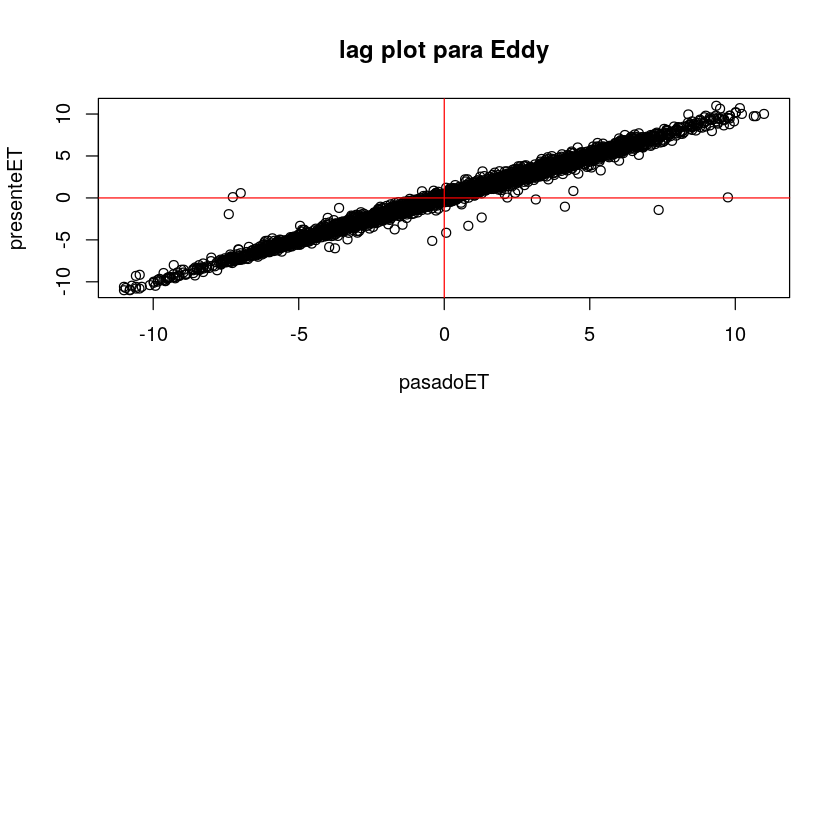

In [35]:
nP = length(Temperatura.Eddy); par(mfrow = c(2,1)) ; resP = Temperatura.Eddy-mean(Temperatura.Eddy); pasadoET= resP[-nP]; presenteET = resP[-1]; plot(presenteET~pasadoET, main = 'lag plot para Eddy'); abline(h = 0, v = 0,col='red')

In [32]:
# d) Coeficiente de correlación serial muestreal
c1P = sum(presenteET*pasadoET)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteDT*pasadoDT)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.9934054

In [21]:
sp = sqrt(((nP-1)*var(Temperatura.Eddy) + (nN-1)*var(Temperatura.DHT))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Temperatura.Eddy) - mean(Temperatura.DHT)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)

[1] -3.192175  2.937841

### Conclusión para temperatura ambiente

A partir de los estimadores combinados (C1 y C0) se obtuvo el coeficiente de correlación serial muestreal

- r1 = 0.9934

Y el intervalo de confianza: **(-3.192, 2.937)**

*como el itervalo de confianza para la diferencia de medias contiene al cero, no tenemos evidencia suficiente para afirmar que las medias son distintas*

## Humedad ambiente

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

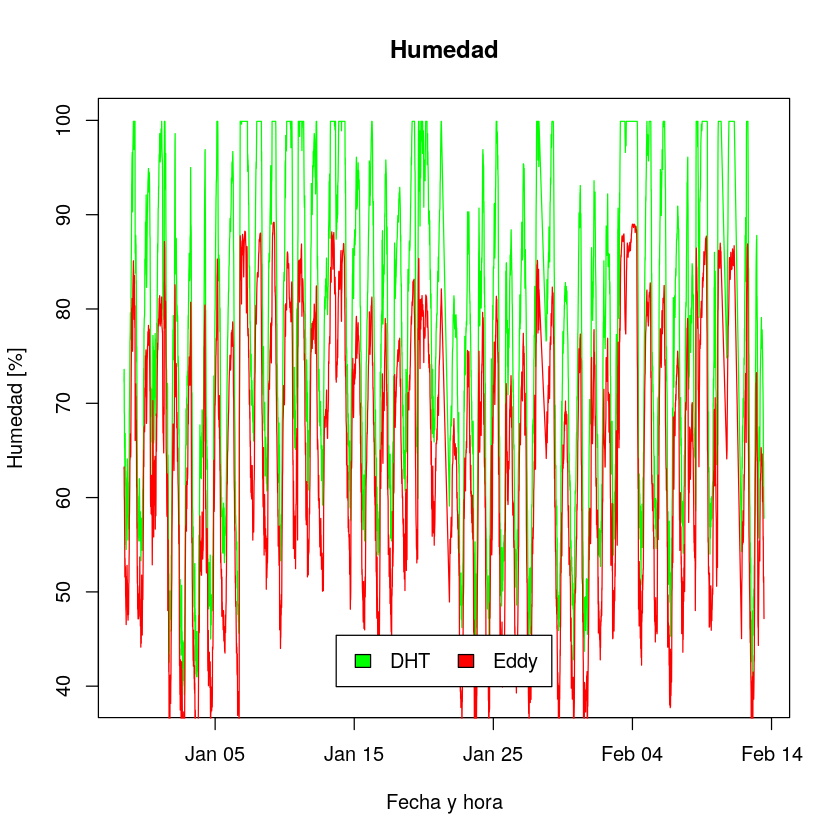

In [93]:
plot(FechayHora, Humedad.DHT, col="green", main="Humedad", xlab="Fecha y hora", ylab="Humedad [%]", type="lines"); lines(FechayHora, Humedad.Eddy,col="red"); legend("bottom", inset=.05, c("DHT","Eddy"), fill=c("green","red"), horiz=TRUE)

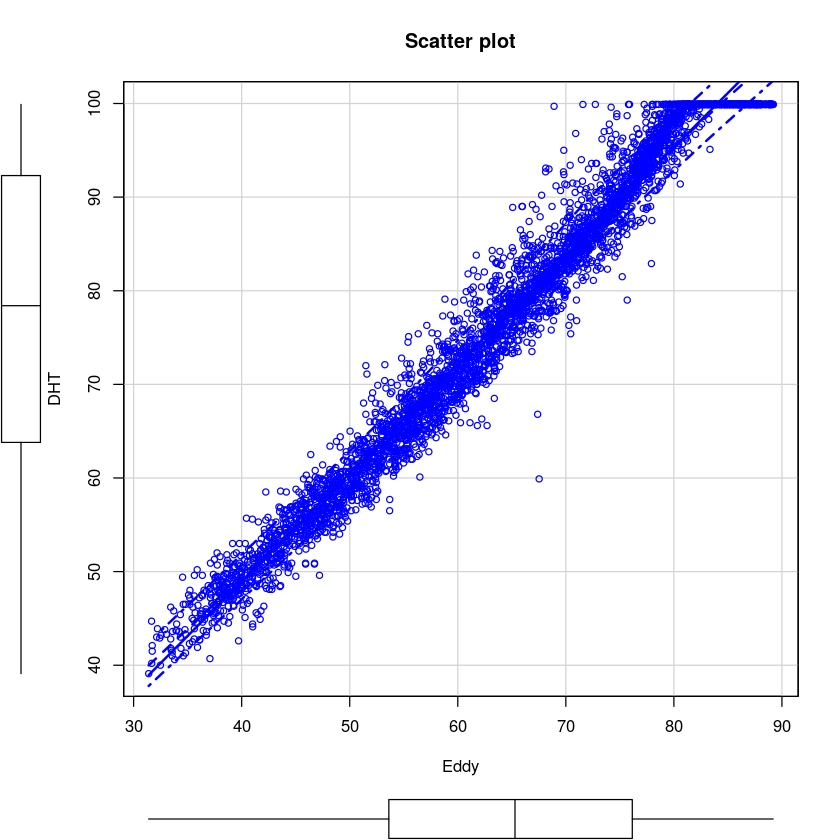

In [94]:
scatterplot(Humedad.DHT ~ Humedad.Eddy, data=datosHT, xlab="Eddy", ylab="DHT", main="Scatter plot") 

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

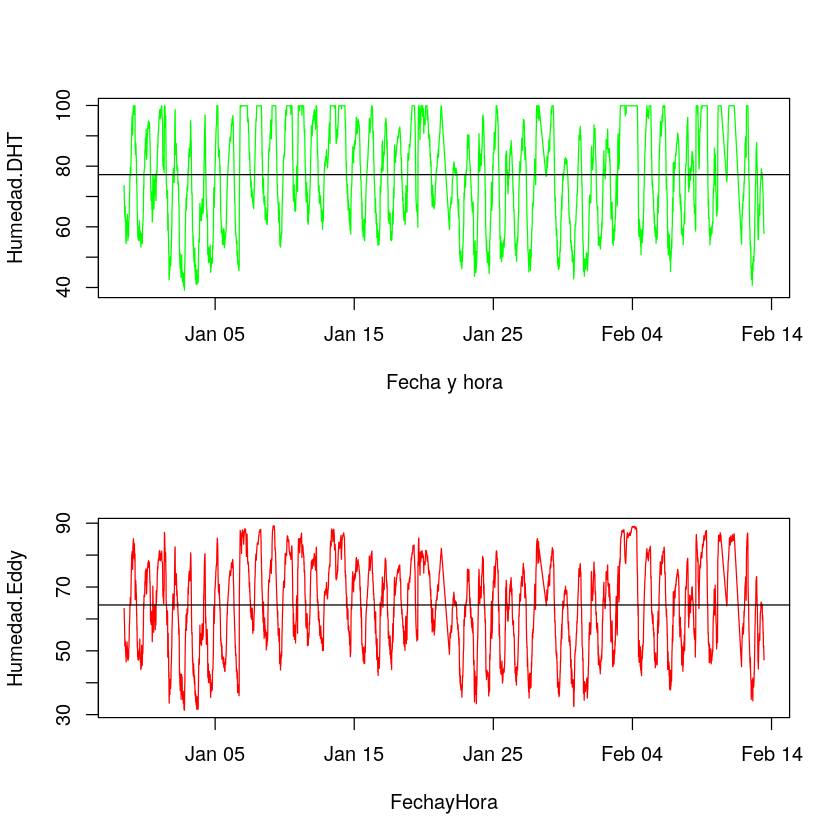

In [79]:
par(mfrow = c(2,1)); plot(Humedad.DHT~FechayHora, col="green", xlab="Fecha y hora", type="l") ; abline(h = mean(Humedad.DHT), v = 0,col='black'); plot(Humedad.Eddy~FechayHora,col="red", type="lines") ; abline(h = mean(Humedad.Eddy), v = 0,col='black')

In [80]:
modeloHEddy = lm(Humedad.Eddy ~ FechayHora)
summary(modeloHEddy)
modeloHDHT = lm(Humedad.DHT ~ FechayHora)
summary(modeloHDHT)


Call:
lm(formula = Humedad.Eddy ~ FechayHora)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.885 -10.754   0.917  11.801  24.882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -2.201e+01  2.709e+02  -0.081    0.935
FechayHora   6.076e-08  1.905e-07   0.319    0.750

Residual standard error: 14.12 on 4216 degrees of freedom
Multiple R-squared:  2.412e-05,	Adjusted R-squared:  -0.0002131 
F-statistic: 0.1017 on 1 and 4216 DF,  p-value: 0.7498



Call:
lm(formula = Humedad.DHT ~ FechayHora)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.631 -13.515   1.133  15.108  23.263 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.452e+02  3.186e+02  -1.084    0.279
FechayHora   2.971e-07  2.241e-07   1.326    0.185

Residual standard error: 16.61 on 4216 degrees of freedom
Multiple R-squared:  0.0004168,	Adjusted R-squared:  0.0001797 
F-statistic: 1.758 on 1 and 4216 DF,  p-value: 0.185


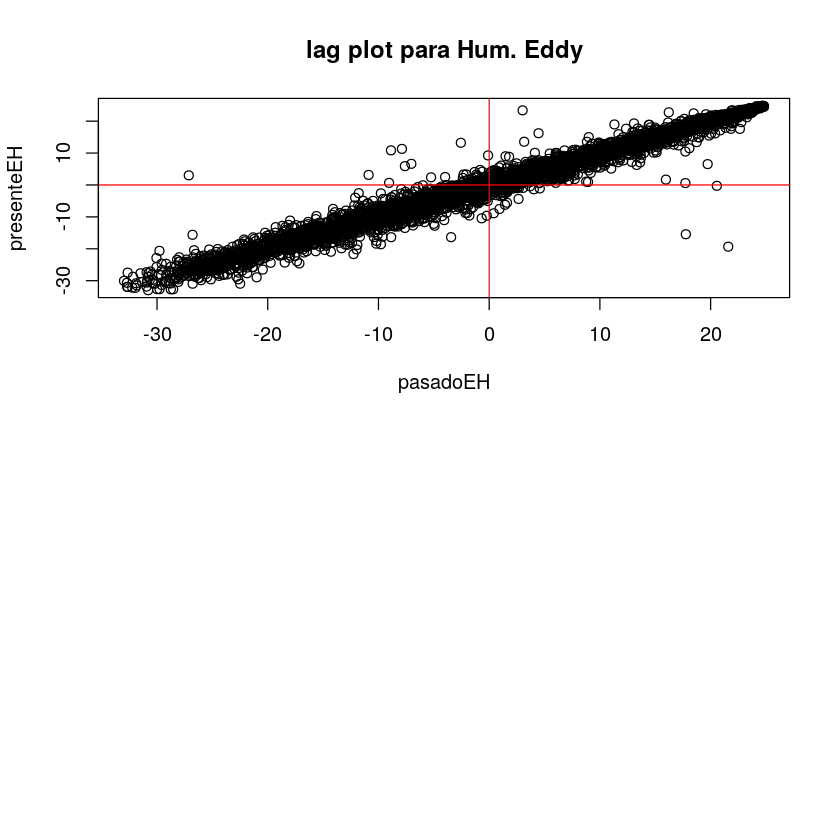

In [83]:
nP = length(Humedad.Eddy)
par(mfrow = c(2,1))
resP = Humedad.Eddy-mean(Humedad.Eddy)
pasadoEH = resP[-nP]
presenteEH = resP[-1]
plot(presenteEH~pasadoEH, main = 'lag plot para Hum. Eddy')
# agrego los ejes
abline(h = 0, v = 0,col='red')

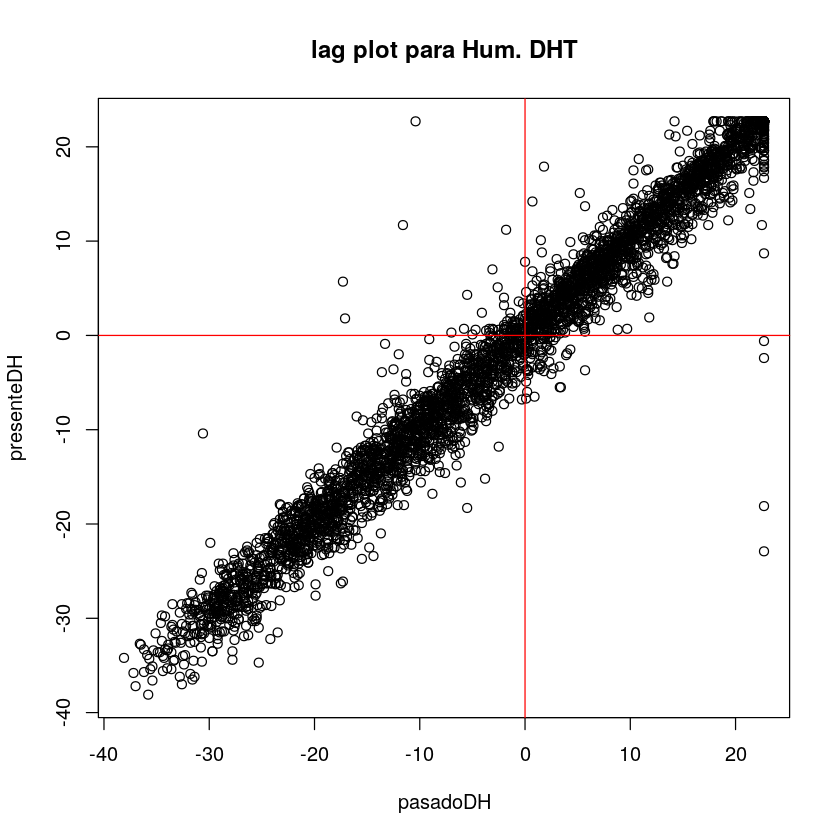

In [84]:
nN = length(Humedad.DHT)
resN = Humedad.DHT-mean(Humedad.DHT)
pasadoDH = resN[-nN]
presenteDH = resN[-1]
plot(presenteDH~pasadoDH, main = 'lag plot para Hum. DHT')
# agrego los ejes
abline(h = 0, v = 0,col='red')

In [85]:
c1P = sum(presenteEH*pasadoEH)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteDH*pasadoDH)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.986071

In [86]:
sp = sqrt(((nP-1)*var(Humedad.Eddy) + (nN-1)*var(Humedad.DHT))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Humedad.Eddy) - mean(Humedad.DHT)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)
# como el itervalo de confianza para la diferencia de medias contiene al
# cero, no tenemos evidencia suficiente para afirmar que las medias
# son distintas

[1] -20.684087  -4.971055

### Conclusión para humedad ambiente


Intervalo de confianza:

<div class="alert alert-block alert-danger">
<b>(-20.684, -4.971)</b> el IC para la diferencia de medias NO contiene al cero, tenemos evidencia suficiente para afirmar que las medias son distintas
</div>



- ¿Cómo podemos arreglar o mejorar los datos y construir el IC?
    - Evitando los valores para los que satura el DHT
    - Desplazando la serie en 10% apox

- IC con datos corregidos

<div class="alert alert-block alert-success">
<b>(-1.557, 8.654)</b> Ahora no tenemos evidencia suficiente para afirmar que las medias son distintas
</div>

In [90]:
idx = Humedad.DHT<=90
Humedad.Eddy = Humedad.Eddy[idx]
Humedad.DHT = Humedad.DHT[idx]
FechayHora = FechayHora[idx]

In [88]:
Humedad.DHT.fixed = (Humedad.DHT) - 15

In [89]:
nP = length(Humedad.Eddy)
par(mfrow = c(2,1))
resP = Humedad.Eddy-mean(Humedad.Eddy)
pasadoEH = resP[-nP]
presenteEH = resP[-1]

nN = length(Humedad.DHT)
resN = Humedad.DHT.fixed-mean(Humedad.DHT.fixed)
pasadoDH = resN[-nN]
presenteDH = resN[-1]

c1P = sum(presenteEH*pasadoEH)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteDH*pasadoDH)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

sp = sqrt(((nP-1)*var(Humedad.Eddy) + (nN-1)*var(Humedad.DHT.fixed))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Humedad.Eddy) - mean(Humedad.DHT.fixed)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)

[1] 0.9733806

[1] -1.557697  8.654591

## Temperatura de suelo

- Sensor HidraProbe II de Stevens
- Sonda DS18B20

In [96]:
datosTS = read.csv("datos/stevens_fc_ds/ds_vs_stevensTiempo.csv", sep=","); head(datosTS); attach(datosTS)

tiempo,Stevens,DS18B20
0.15,25.6,26.00
0.30,26.2,26.06
0.45,26.2,26.00
0.60,26.2,26.00
0.75,26.2,26.00
0.90,26.2,26.00


Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

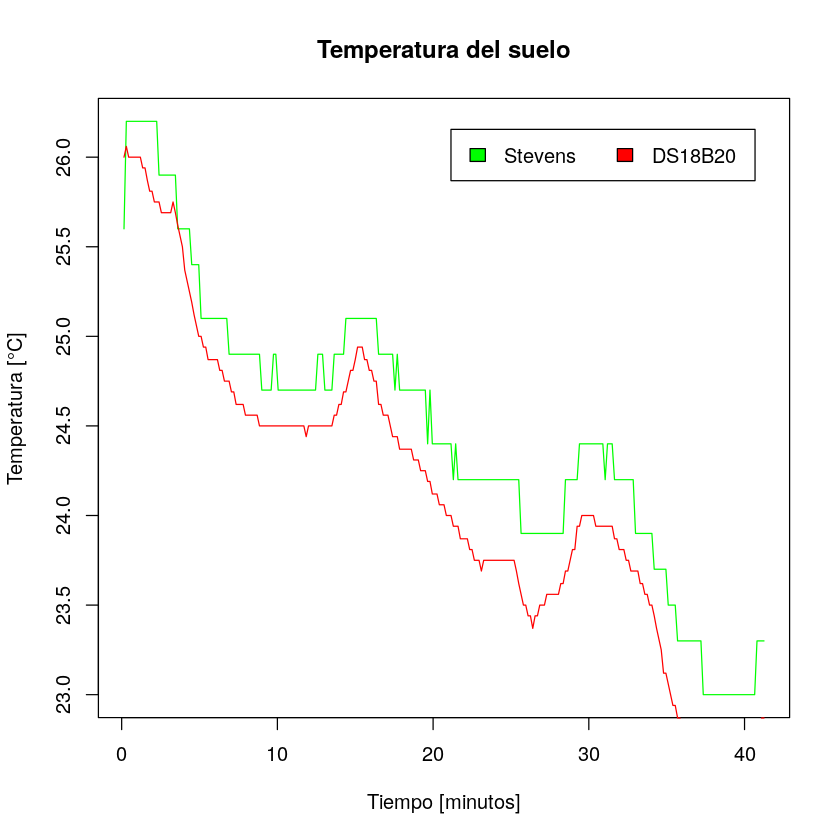

In [97]:
plot(tiempo, Stevens, col="green", main="Temperatura del suelo", xlab="Tiempo [minutos]", ylab="Temperatura [°C]", type="lines"); lines(tiempo, DS18B20, col="red"); legend("topright", inset=.05, c("Stevens","DS18B20"), fill=c("green","red"), horiz=TRUE)

- Se se observa una tendencia: 
    - pendiente -0.062943 (St) 
    - pendiente -0.069225 (DS)

In [98]:
modeloS = lm(Stevens ~ tiempo)
summary(modeloS)
modeloD = lm(DS18B20 ~ tiempo)
summary(modeloD)


Call:
lm(formula = Stevens ~ tiempo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49826 -0.24247 -0.05543  0.24117  0.61797 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.764746   0.035977  716.14   <2e-16 ***
tiempo      -0.062943   0.001507  -41.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2975 on 273 degrees of freedom
Multiple R-squared:  0.8648,	Adjusted R-squared:  0.8643 
F-statistic:  1746 on 1 and 273 DF,  p-value: < 2.2e-16



Call:
lm(formula = DS18B20 ~ tiempo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44412 -0.24639 -0.08226  0.27158  0.56614 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.554457   0.035628   717.3   <2e-16 ***
tiempo      -0.069225   0.001492   -46.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2946 on 273 degrees of freedom
Multiple R-squared:  0.8875,	Adjusted R-squared:  0.8871 
F-statistic:  2153 on 1 and 273 DF,  p-value: < 2.2e-16


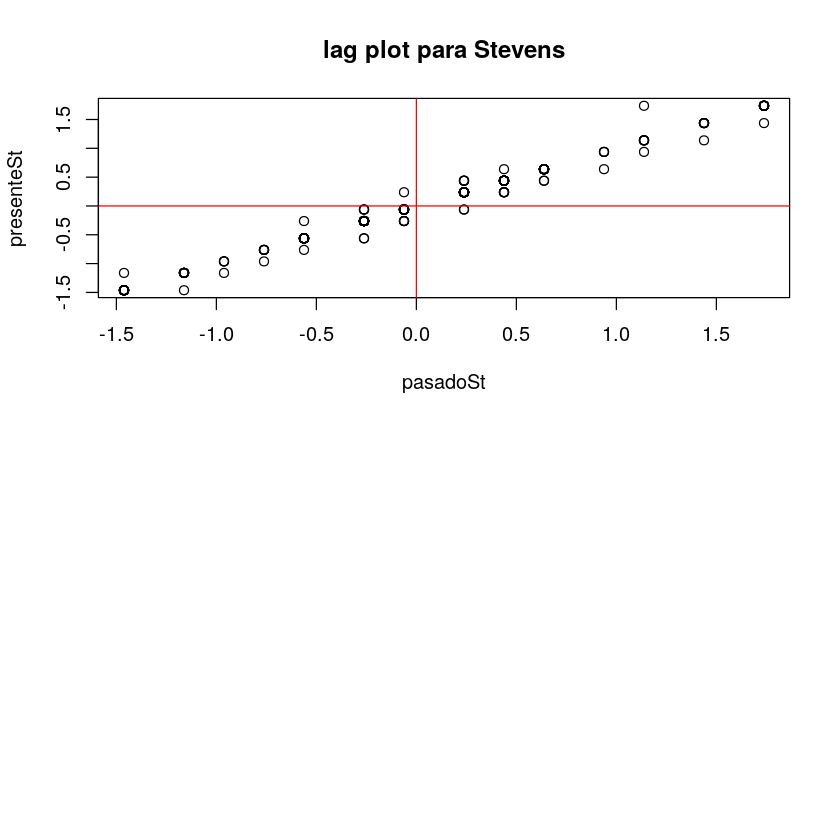

In [99]:
nP = length(Stevens)
par(mfrow = c(2,1))
resP = Stevens-mean(Stevens)
pasadoSt = resP[-nP]
presenteSt = resP[-1]
plot(presenteSt~pasadoSt, main = 'lag plot para Stevens')
# agrego los ejes
abline(h = 0, v = 0,col='red')

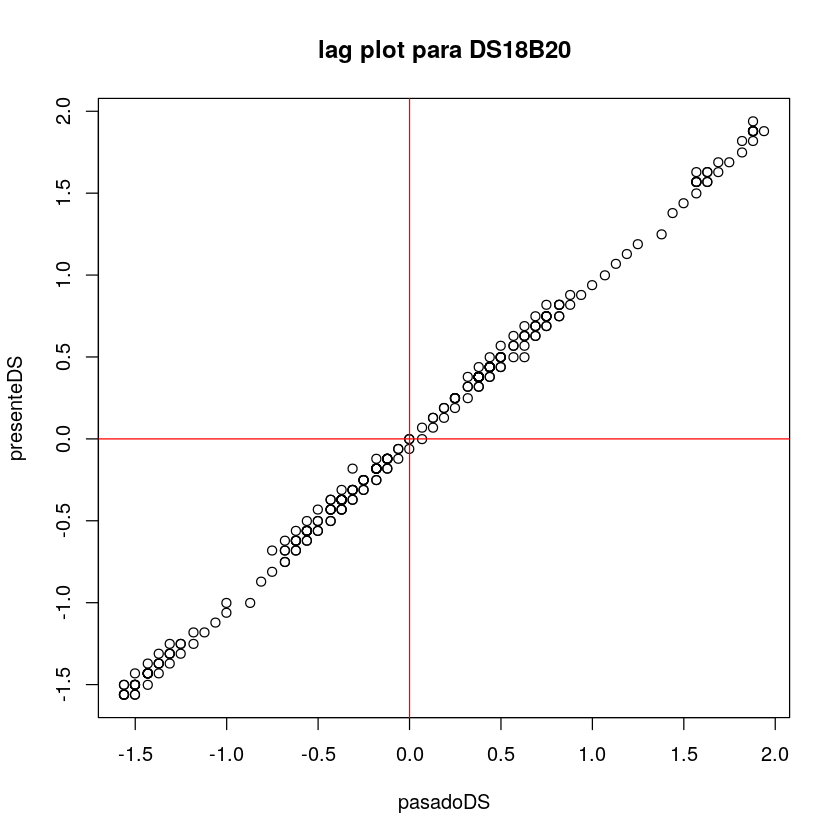

In [100]:
nN = length(DS18B20)
resN = DS18B20-mean(DS18B20)
pasadoDS = resN[-nN]
presenteDS = resN[-1]
plot(presenteDS~pasadoDS, main = 'lag plot para DS18B20')
# agrego los ejes
abline(h = 0, v = 0,col='red')

In [101]:
c1P = sum(presenteSt*pasadoSt)/(nP-1)
c0P = sum(resP^2)/(nP-1)
c1N = sum(presenteDS*pasadoDS)/(nN-1)
c0N = sum(resN^2)/(nN-1)
# los estimadores combinados
c1 = ((nP-1)*c1P + (nN-1)*c1N)/(nP+nN-2)
c0 = ((nP-1)*c0P + (nN-1)*c0N)/(nP+nN-2)
# estimacion del alpha:
(r1 = c1/c0)

[1] 0.9865742

In [102]:
sp = sqrt(((nP-1)*var(Stevens) + (nN-1)*var(DS18B20))/(nP+nN-2))
correc = sqrt((1+r1)/(1-r1))
# error estandar corregido:
SE = correc*sp*sqrt(1/nP + 1/nN)
dif = mean(Stevens) - mean(DS18B20)
z = qnorm(1-0.05/2)
c(dif-z*SE, dif+z*SE)
# como el itervalo de confianza para la diferencia de medias contiene al
# cero, no tenemos evidencia suficiente para afirmar que las medias
# son distintas

[1] -1.373154  2.053809

## Conclusión temperatura suelo

- Intervalo de confianza:

<div class="alert alert-block alert-success">
<b>(-1.3731, 2.0538)</b> No tenemos evidencia suficiente para afirmar que las medias son distintas
</div>

# Conclusiones

- La metodología utilizada nos permite asegurar con un 95% de confianza si las medias de dos sensores pueden ser consideradas distintas
- Este método nos serviría para agregar confiabilidad a los sensores de bajo costo que se incorporan